In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn import datasets, metrics, decomposition
from sklearn.metrics import confusion_matrix
#uyarılar
import warnings 
warnings.filterwarnings('ignore')

In [2]:
veri= pd.read_csv("kanser.csv")
veri.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#gereksiz özellikleri çıkarma 
veri.drop(["Unnamed: 32","id"],inplace=True,axis=1)

In [4]:
veri=veri.rename(columns={"diagnosis":"hedef"})

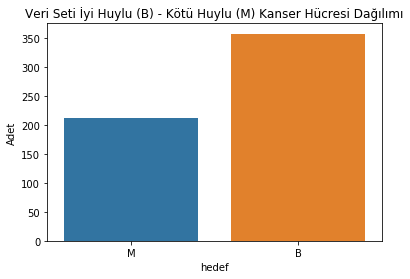

B    357
M    212
Name: hedef, dtype: int64


In [5]:
#hastalık dağılımı
plt.figure()
sns.countplot(veri["hedef"])
plt.ylabel("Adet")
plt.title("Veri Seti İyi Huylu (B) - Kötü Huylu (M) Kanser Hücresi Dağılımı")
plt.show()
print(veri.hedef.value_counts())

In [6]:
veri["hedef"]= [1 if i.strip()=="M" else 0 for i in veri.hedef]
veri.head()

,hedef,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
print("Veri Uzunluğu :",len(veri))

Veri Uzunluğu : 569


In [8]:
print("Verinin şekli :",veri.shape)

Verinin şekli : (569, 31)


In [9]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
hedef                      569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

In [10]:
veri.describe()

,hedef,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Figure size 864x576 with 0 Axes>

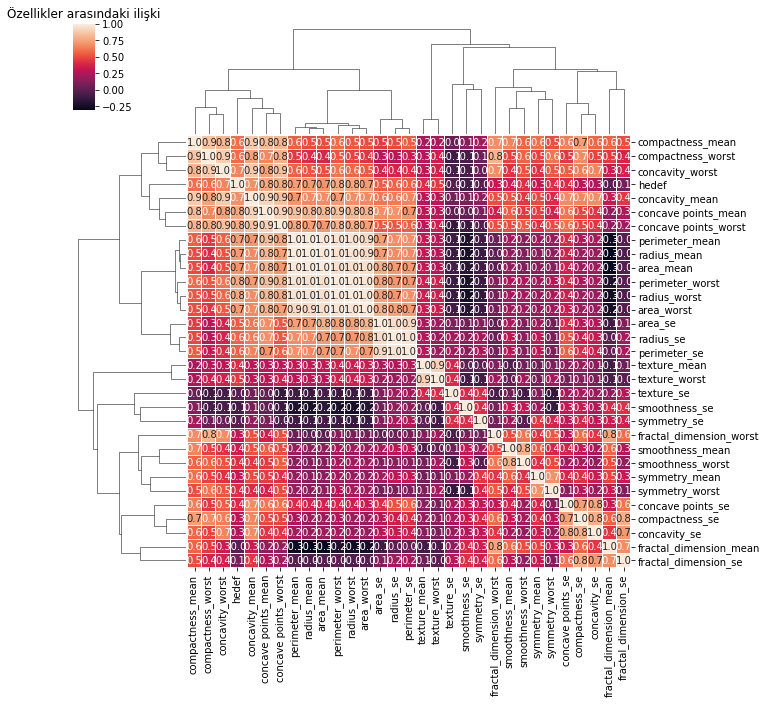

In [11]:
# değerler arasındaki ilişkiye bakalım
corr_matrix =veri.corr()
plt.figure(figsize=(12,8))
sns.clustermap(corr_matrix,annot=True,fmt=".1f",linewidths=.01)
plt.title("Özellikler arasındaki ilişki")
plt.show()

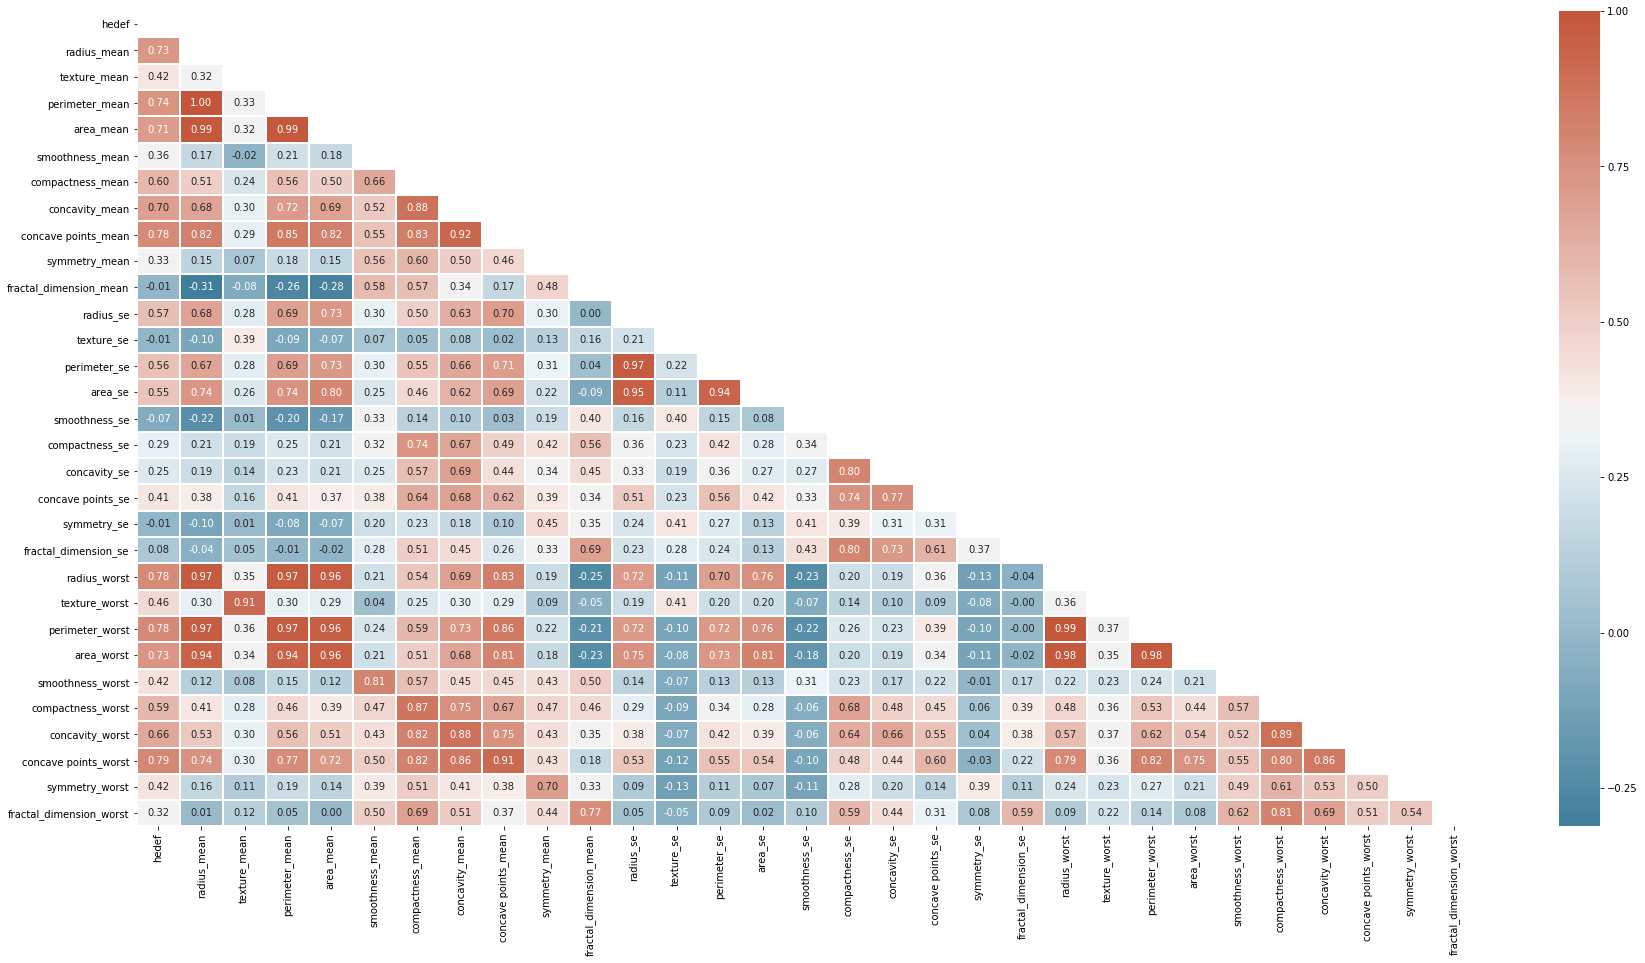

In [12]:
#Veri kümesinin tüm özellikleri arasındaki korelasyon ısı haritası
plt.figure(figsize=(30,15))
#korelasyon matrisini hesapla
corr = veri.corr()
#üst üçgen için bir maske oluşturun
mask = np.triu(np.ones_like(corr, dtype = bool))
# Özel bir farklılaşan renk haritası oluşturun
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# ısı haritasını maske ve doğru en boy oranıyla çizin
sns.heatmap(corr, mask = mask, linewidths = 1, cmap=cmap, annot = True, fmt = ".2f")
plt.show()

<Figure size 432x288 with 0 Axes>

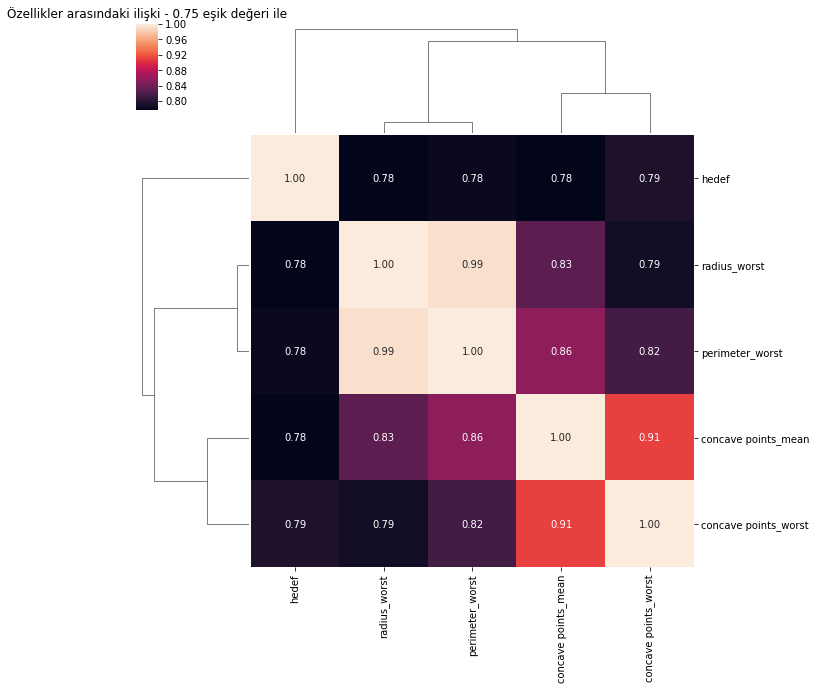

In [13]:
#hedef ile arasındaki ilişki artı/ekşi 0.75 den büyük olanları ayrıca göz ardı edilemeyeneler
threshold=0.75
filtre = np.abs(corr_matrix["hedef"])>threshold
corr_features= corr_matrix.columns[filtre].tolist()
plt.figure()
sns.clustermap(veri[corr_features].corr(),annot=True,fmt=".2f")
plt.title("Özellikler arasındaki ilişki - 0.75 eşik değeri ile")
plt.show()

# sonuçta belirleyiciler

<Figure size 432x288 with 0 Axes>

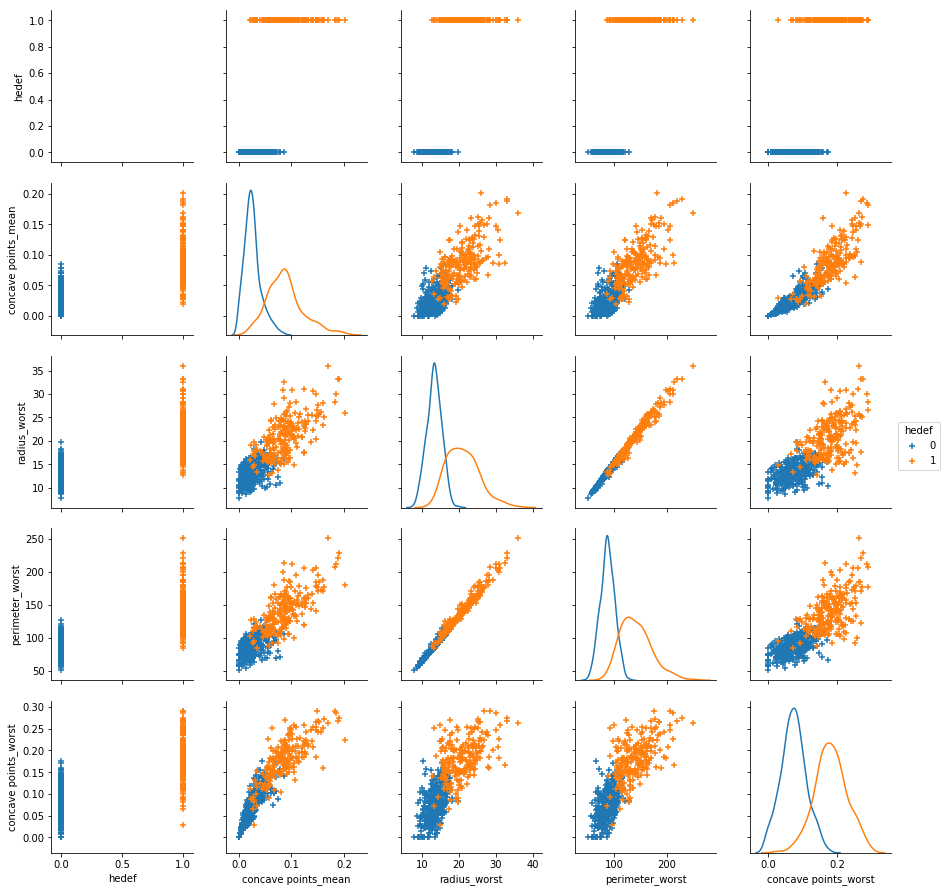

In [14]:
# hedef ile ilişkili özelliklerin saçılımına bakalım
plt.figure()
sns.pairplot(veri[corr_features],
            diag_kind="kde",markers="+",hue="hedef")
plt.show()

In [15]:
y= veri.hedef
x= veri.drop(["hedef"],axis =1)
columns = x.columns.tolist()

In [16]:
#aykırı değer tespiti
#yerel aykırı faktör yöntemi
clf=LocalOutlierFactor()

y_pred =clf.fit_predict(x)
X_score =clf.negative_outlier_factor_

In [17]:
#skoru bir veri çerçevesi yapıp içerisine ekleyelim
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

In [18]:
# belirli bir eşik değerine göre aykırı eşik değerrini bulalım 
threshold = -2.2
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()

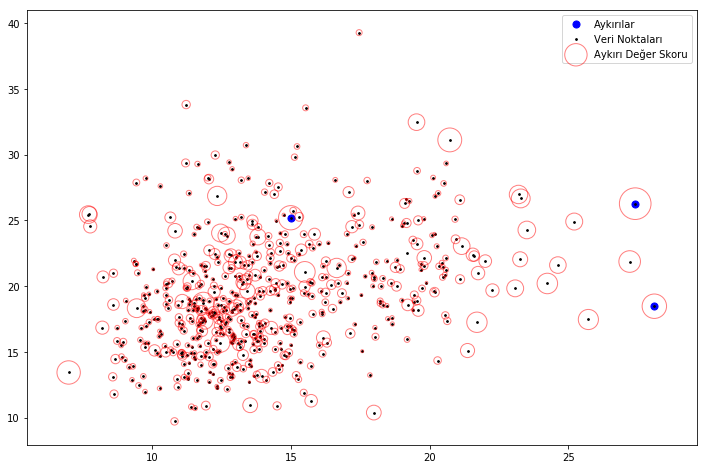

In [19]:
# yerel aykırı faktör yöntemi ile belirlenen aykırı değerleri çıkaralım
plt.figure(figsize=(12,8))
#aykırı değerleri çizdim
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1],color="blue",
           s=50,label="Aykırılar")
#tüm veri noktaları
plt.scatter(x.iloc[:,0],x.iloc[:,1],color="k",s=3,label="Veri Noktaları")
#yarıçaplarını hesapladım
radius = (X_score.max() - X_score)/(X_score.max()-X_score.min())
# yarıcap ne kadar büyükse o kadar büyük çemberler çizdim
outlier_score["radius"]=radius
plt.scatter(x.iloc[:,0],x.iloc[:,1],s=1000*radius,edgecolors = "r",
            alpha =0.5,facecolors ="none",
           label="Aykırı Değer Skoru")
plt.legend()
plt.show()

In [20]:
#aykırı değerleri çıkaralım
x=x.drop(outlier_index)
y=y.drop(outlier_index).values

Eğitim ve Test veri seti olarak bölünmesi

In [21]:
X_train , X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state =42)

In [22]:
#Standardizasyon
scaler = StandardScaler() 
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [23]:
#görselleştirmede kullanmak için veri çercevesi oluşturma
X_train_df =pd.DataFrame (X_train,columns =columns)
X_train_df_describe = X_train_df.describe()
X_train_df["hedef"]=Y_train

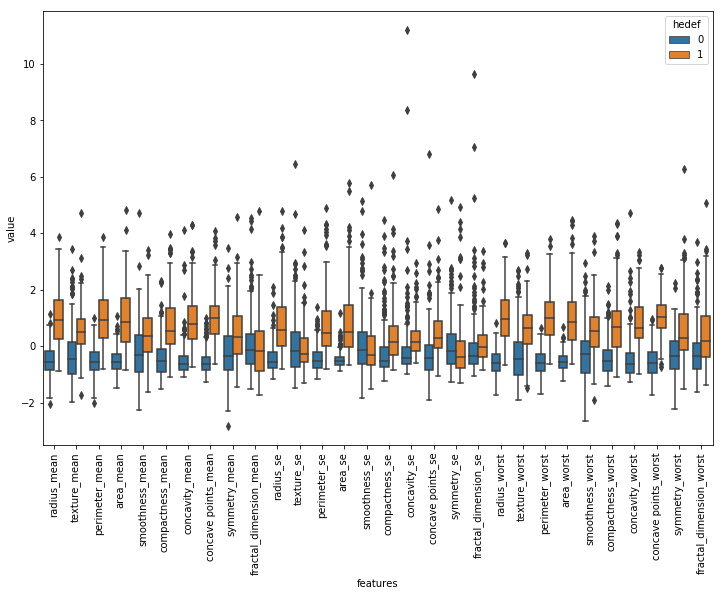

In [24]:
#kutu grafiği
data_melted = pd.melt(X_train_df,id_vars ="hedef",
                     var_name = "features",
                     value_name = "value")

plt.figure(figsize=(12,8))
sns.boxplot(x="features",y="value",hue="hedef",data=data_melted)
plt.xticks(rotation=90)
plt.show()


K-EN YAKIN KOMŞU ALGORİTMASI

In [25]:
knn=KNeighborsClassifier(n_neighbors =2)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [26]:
y_pred=knn.predict(X_test)

Karışıklık matrisi  [[102   0]
 [ 11  57]]


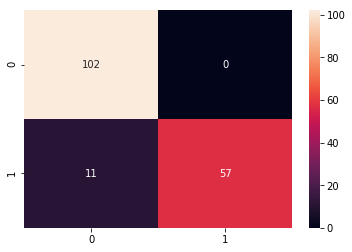

In [27]:
#karışıklık matrisi
cm=confusion_matrix(Y_test,y_pred)
print("Karışıklık matrisi " ,cm)
plt.figure()
sns.heatmap(cm ,annot =True,fmt =".0f")
plt.show()

In [28]:
dogruluk =accuracy_score(Y_test,y_pred)
print("Doğruluk : ",dogruluk)

Doğruluk :  0.9352941176470588


In [29]:
# en iyi k değerinin bulunması

def eniyiParametreler(x_train,x_test,y_train,y_test):
    
    # k değeri
    k_range= list(range(1,31))
    # uniform = tek tip ağırlıklar.Tüm noktalar eşit olarak ağırlıklandılırlılar.
    #distance = mesafelerin terisne göre ağırlık noktaları bu durumda , yakın olanlara daha çok ağırlık ver
    weight_options =["uniform","distance"] #farklı knn parametreleri bulunmakta
    
    #ızgara araması için parametreler bir sözlük içerisine ekleyelim
    param_grid=dict(n_neighbors = k_range,weights = weight_options)
    
    #knn sınıflandırma
    knn=KNeighborsClassifier()
    #capraz doğrulama ile ızgara arama
    grid=GridSearchCV(knn,param_grid ,cv =10 ,scoring ="accuracy")
    #eğitim
    grid.fit(x_train,y_train)
    
    #en iyi sonuc veren paramaterelerin gösterimi
    print("En iyi sonuç :{} ve parametreler :{}".format(grid.best_score_,grid.best_params_))
    print()
    
    # en iyi sonucu veren parametreler ile yeni bir en  yakın komşu modeli oluşturalım 
    knn=KNeighborsClassifier(**grid.best_params_)
    #eğitim
    knn.fit(x_train,y_train)
    
    
    #tahminleme 
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    #karışıklık matrisi
    cm_test= confusion_matrix(y_test,y_pred_test)
    cm_train=  confusion_matrix(y_train,y_pred_train)
    
    #doğruluk ve sonuçların yazdırılması 
    acc_test = accuracy_score(y_test,y_pred_test)
    acc_train= accuracy_score(y_train,y_pred_train)
    print("Test doğruluğu :{},Eğitim Doğruluğu : {}".format(acc_test,acc_train))
    print()
    print("Karışıklık matrisi Test : ")
    print(cm_test)
    print("Karışıklık matrisi eğitim : ")
    print(cm_train)
    
    return grid

In [30]:
#en iyi k değeri ile oluşturulan model
gird = eniyiParametreler(X_train,X_test,Y_train,Y_test)

En iyi sonuç :0.9722222222222222 ve parametreler :{'weights': 'distance', 'n_neighbors': 4}

Test doğruluğu :0.9470588235294117,Eğitim Doğruluğu : 1.0

Karışıklık matrisi Test : 
[[100   2]
 [  7  61]]
Karışıklık matrisi eğitim : 
[[255   0]
 [  0 141]]


Temel Bileşenler Analizi :
Verimizi 2 temel bileşene düşürerek sınıflandıma yapalım.

In [31]:
#Standardizasyon 

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [32]:
# temel bileşeni tanımla, 2 tane bileşenden oluşsun.
pca = PCA(n_components=2)

In [33]:
#pca eğitimi
pca.fit(x_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
#pca uygula
X_reduced_pca=pca.transform(x_scaled)

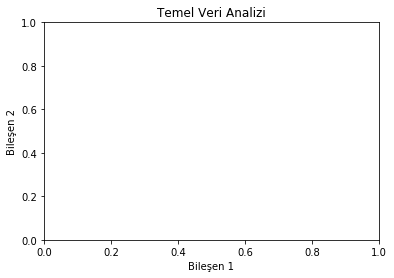

In [35]:
# pca i yorumlamak için veri çerçevesine alalım 
pca_data = pd.DataFrame(X_reduced_pca,columns =["p1","p2"])
pca_data["hedef"]=y
plt.figure()
#sns.scatterplot(x="p1",y="p2",hue="hedef",data=pca_data)
plt.title("Temel Veri Analizi")
plt.xlabel("Bileşen 1")
plt.ylabel("Bileşen 2")
plt.show()

In [36]:
#pca sonucu elde edilen verilerin eğitim test bölünmesi
X_train_pca,X_test_pca,Y_train_pca,Y_test_pca =train_test_split(X_reduced_pca,y,test_size=0.3,random_state=42)

In [37]:
#pca sonucu elde edilen veri için knn değerleri
grid_pca = eniyiParametreler(X_train_pca,X_test_pca,Y_train_pca,Y_test_pca)

En iyi sonuç :0.952020202020202 ve parametreler :{'weights': 'uniform', 'n_neighbors': 6}

Test doğruluğu :0.9352941176470588,Eğitim Doğruluğu : 0.9595959595959596

Karışıklık matrisi Test : 
[[100   2]
 [  9  59]]
Karışıklık matrisi eğitim : 
[[250   5]
 [ 11 130]]


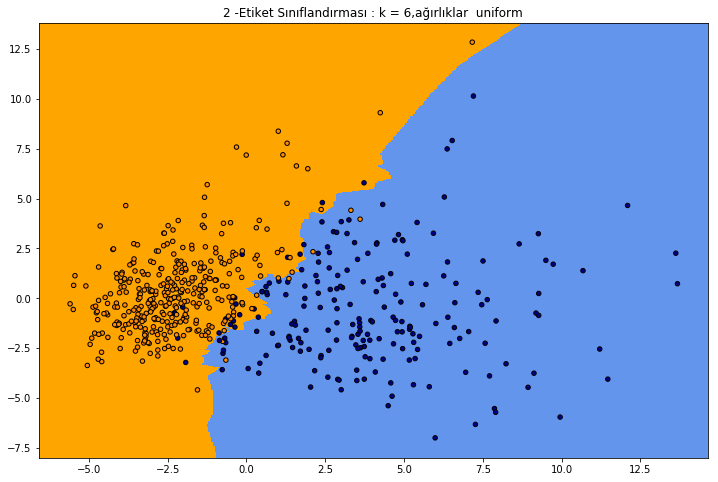

In [38]:
# pca sonucu elde edilen verilerin tahminleştirilmesi ve görsellştirilmesi
cmap_light=ListedColormap(["orange","cornflowerblue"])
cmap_bold=ListedColormap(["darkorange","darkblue"])

h=0.05#mesh boyutu
X= X_reduced_pca
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                 np.arange(y_min,y_max,h))

Z=grid_pca.predict(np.c_[xx.ravel(),yy.ravel()])

#
Z=Z.reshape(xx.shape)
plt.figure(figsize=(12,8))
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

#eğitimde kullanılan her bir noktayı görselleştirelim
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,
            edgecolor="k",s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("{} -Etiket Sınıflandırması : k = {},ağırlıklar  {}".
          format(2,grid_pca.best_estimator_.n_neighbors,grid_pca.best_estimator_.weights))
plt.show()

Komşuluk  Bileşenleri Analizi

Çok değişkenli verilerin veriler üzerinde belirli bir mesafe ölçüsüne göre farklı  sınıflarda sınıflandırılması için denetimli öğrenme yöntemidir.
Boyut indirgeme tekniği

LOGISTIC REGRESSION

In [39]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
y_pred = lr.predict(X_test)

In [43]:
print("Sınıflandırıcı için sınıflandırma raporu {} :".format({metrics.classification_report(Y_test, y_pred)}))


Sınıflandırıcı için sınıflandırma raporu {'             precision    recall  f1-score   support\n\n          0       0.96      1.00      0.98       102\n          1       1.00      0.94      0.97        68\n\navg / total       0.98      0.98      0.98       170\n'} :
